In [4]:
import networkx as nx
import numpy as np
import pickle
from kmapper import jupyter
import datetime
import pandas as pd
from persim import plot_diagrams
import seaborn as sns
import ot
import os
import sys
from pathlib import Path

# Updating paths for nammu import 
home_path = str(Path("Curvature_Values_Analysis").resolve().parent.parent)
sys.path.append(home_path + "/src")

from nammu.topology import PersistenceDiagram
import seaborn as sns
import ot
import os

In [5]:
! python ../src/compute_curvature.py 
! python ../src/compute_curvature.py -K 12 -n 6 -p .2

Reading pickle file
Computing Curvature Values and Persistence Diagrams
Computing Mapper Algorithm...
Setting Lens
Setting Cover
Generating networkx Graph...
Using Ollivier Ricci filtration to compute edge curvature values and persistence diagrams. 
Reading pickle file
Computing Curvature Values and Persistence Diagrams
Computing Mapper Algorithm...
Setting Lens
Setting Cover
Generating networkx Graph...
Using Ollivier Ricci filtration to compute edge curvature values and persistence diagrams. 


In [2]:
with open('../outputs/curvature/results_ncubes6_20perc_K12.pkl', 'rb') as f1:
    dic1 = pickle.load(f1)

/Users/gathrid/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator KMeans from version 1.2.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/gathrid/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
with open('../outputs/curvature/results_ncubes6_40perc_K8.pkl', 'rb') as f2:
    dic2 = pickle.load(f2)

In [5]:
tm1 = dic1[1]
tm2 = dic2[1]

<AxesSubplot:xlabel='Ollivier Ricci Edge Curvatures', ylabel='Probability'>

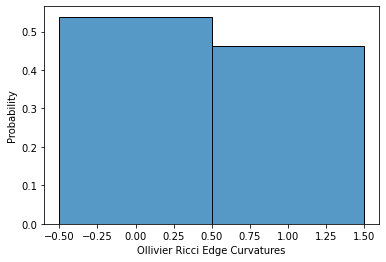

In [6]:
tm1.plot_curvature()

<AxesSubplot:xlabel='Ollivier Ricci Edge Curvatures', ylabel='Probability'>

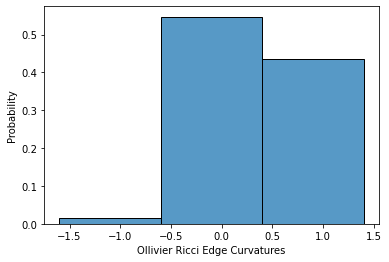

In [7]:
tm2.plot_curvature()

In [ ]:
def normalize_curvature(curvature):
    # Assumming that for val in curvature, val in [-2,1]
    tmp = curvature.copy()+ 2 # maps to [0, 3]
    tmp = tmp/sum(tmp)
    return tmp

In [ ]:
curvature1 = tm1.curvature.copy()
curvature2 = tm2.curvature.copy()

In [ ]:
M = ot.dist(curvature1.reshape(len(curvature1),1), curvature2.reshape(len(curvature2), 1))
M.shape
W = ot.emd2(normalize_curvature(curvature1),normalize_curvature(curvature2), M)
print(W)

# Questions
- What is the range for a curvature value? 
    - I assumed it was [-1,1], but I'm seeing min values of -1.1
    - need to normalize these values to put into ot... easiest way to do so is to use range
- How are we going to compare Simpl Complexes with different graphs?
    - floyd_marshal generates a matrix M for optimal transport based on a single graph 
    - in the case of comparing different graphs, we need $M \in \mathbb{R}^{n x n^\prime}$, where $n$ and $n^\prime$ are the number of vertices of each graph, respectively
    - $\color{red}{\text{(Temporary) Solution: Use ot.dist(), which gives a metric cost matrix}}$
    